In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [83]:
x,y = make_moons(n_samples=1000,noise=0.2)

In [84]:
df = {"x1":x[:,0], "x2":x[:,1], "y":y}

In [85]:
data = pd.DataFrame(df)
data.head(5)

,x1,x2,y
0,0.354570,-0.847485,1
1,2.378544,0.245895,1
2,0.482560,-0.021996,1
3,1.164935,-0.784288,1
4,0.394373,-0.217437,1


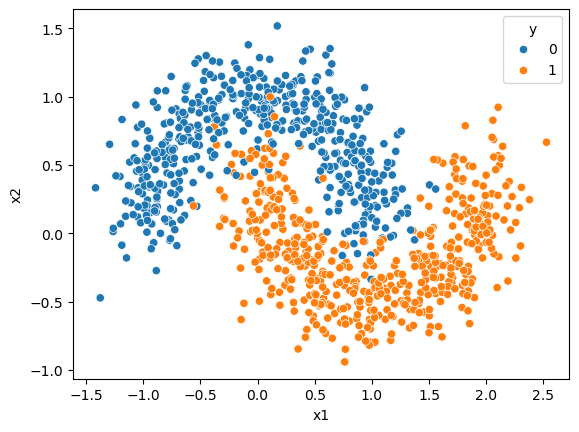

In [86]:
sns.scatterplot(x="x1", y="x2", data=data, hue="y")
plt.show()

In [87]:
x_a = data.iloc[:,:-1]
y_a = data["y"]

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a, test_size=0.2, random_state=42)

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [90]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)*100 , dt.score(x_train,y_train)*100

(92.0, 100.0)

In [91]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_test,y_test)*100 , sv.score(x_train,y_train)*100

(95.5, 96.5)

In [92]:
gn = GaussianNB()
gn.fit(x_train,y_train)
gn.score(x_test,y_test)*100 , gn.score(x_train,y_train)*100

(82.0, 86.5)

# Ensemble Learning

In [93]:
from sklearn.ensemble import VotingClassifier

In [94]:
li = [("dt1",DecisionTreeClassifier(),), ("sv1",SVC()), ("gn1",GaussianNB())]

In [95]:
vc = VotingClassifier(li) # If you want to increase accuracy then do the improve weights=[10,10,10] values.
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gn1', GaussianNB())])

In [96]:
vc.score(x_test,y_test)*100 , vc.score(x_train,y_train)*100

(94.5, 97.25)

# To check base on algorithms answers.

In [97]:
prd = {"DecisionTreeClassifier":dt.predict(x_test), "SVC":sv.predict(x_test), "GaussianNB":gn.predict(x_test),
       "VotingClassifier":vc.predict(x_test)}

In [98]:
pd.DataFrame(prd)

,DecisionTreeClassifier,SVC,GaussianNB,VotingClassifier
0,1,1,1,1
1,0,0,0,0
2,1,1,0,1
3,1,1,1,1
4,0,0,0,0
...,...,...,...,...
195,0,1,0,0
196,1,1,1,1
197,0,0,1,0
198,0,0,0,0
